In [1]:
#Please execute this cell
import sys
sys.path.append('../../')
import jupman
from sciprog import draw_mat
from sciprog import draw_nx
%matplotlib inline

# Network statistics solutions

## [Download exercises zip](../../_static/network-statistics-exercises.zip)

[Browse files online](https://github.com/DavidLeoni/datasciprolab/tree/master/exercises/network-statistics)


## What to do

- **Make sure you have installed** [the required libraries](https://datasciprolab.readthedocs.io/en/latest/exercises/matrix-networks/matrix-networks-solution.html#Required-libraries)
- unzip exercises in a folder, you should get something like this: 

```

-jupman.py
-sciprog.py
-other stuff ...
-exercises
     |- network-statistics
         |- network-statistics-exercise.ipynb     
         |- network-statistics-solution.ipynb
         |- other stuff ..
```

<div class="alert alert-warning">

**WARNING 1**: to correctly visualize the notebook, it MUST be in an unzipped folder !
</div>


- open Jupyter Notebook from that folder. Two things should open, first a console and then browser. 
- The browser should show a file list: navigate the list and open the notebook `exercises/network-statistics/network-statistics-exercise.ipynb`

<div class="alert alert-warning">

**WARNING 2**: DO NOT use the _Upload_ button in Jupyter, instead navigate in Jupyter browser to the unzipped folder !
</div>

- Go on reading that notebook, and follow instuctions inside.


Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`
- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`
- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`
- If the notebooks look stuck, try to select `Kernel -> Restart`





## Graph formats

**Before proceeding further, make sure you did the** [exercises about dictionaries](https://datasciprolab.readthedocs.io/en/latest/exercises/dictionaries/dictionaries-solution.html)

### Adjacency lists

So far, we represented graphs as matrices, saying they are good when the graph is dense, that is any given node is likely to be connected to almost all other nodes - or equivalently, many cell entries in the matrix are different from zero. But if this is not the case, other representations might be needed. For example, we can represent a graph as a _adjacency lists_.

Let's look at this 6x6 boolean matrix:


In [2]:
m = [
    [False, False, False, False, False, False],
    [False, False, False, False, False, False],
    [True,  False, False, True,  False, False],
    [False, False, False, False, False, False],
    [False, False, False, False, False, False],
    [False, False, True,  False, False, False]
]


We see just a few `True`, so by drawing it we don't expect to see many edges:

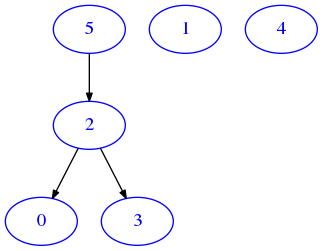

In [3]:
draw_mat(m)

As a more compact representation, we might represent the data as a dictionary of _adjacency lists_ where the keys are the node indexes and the to each node we associate a list with the target nodes it points to.

To reproduce the example above, we can write like this:

In [4]:

d = {
         0: [],     # node 0 links to nothing
         1: [],     # node 1 links to nothing
         2: [0,3],  # node 2 links to node 0 and 3
         3: [],     # node 3 links to nothing
         4: [],     # node 4 links to nothing
         5: [2]     # node 5 links to node 2
       }


In `sciprog.py`, we provide also a function `sciprog.draw_adj` to quickly inspect such data structure:

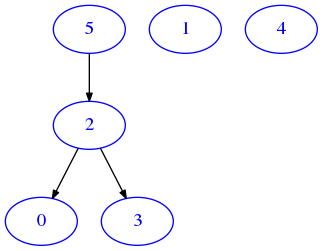

In [5]:
from sciprog import draw_adj

draw_adj(d)

As expected, the resulting graph is the name as for the equivalent matrix representation.

### mat_to_adj

Implement the following function. Remember that to create an empty dict you have to write `dict()`

In [6]:
def mat_to_adj(bool_mat):
    """
        Takes a boolean nxn matrix and RETURN the equivalent representation as dictionary of adjacency lists
    """
    #jupman-raise
    ret = dict()
    n = len(bool_mat)
    for i in range(n):
        ret[i] = []
        for j in range(n):
            if bool_mat[i][j]:
                ret[i].append(j)
    return ret
    #/jupman-raise

m1 = [
        [False]
    ]

d1 =  {
         0:[]
     }

assert mat_to_adj(m1) == d1

m2 = [
        [True]
    ]

d2 =  {
         0:[0]
     }

assert mat_to_adj(m2) == d2


m3 = [
        [False,False],
        [False,False]
    ]

d3 =  {
         0:[],
         1:[]
     }


assert mat_to_adj(m3) == d3


m4 = [
        [True,True],
        [True,True]
    ]

d4 =  {
         0:[0,1],
         1:[0,1]
     }


assert mat_to_adj(m4) == d4

m5 = [
        [False,False],
        [False,True]
    ]

d5 =  {
         0:[],
         1:[1]
     }


assert mat_to_adj(m5) == d5


m6 = [
        [True,False,False],
        [True, True,False],
        [False,True,False]  
    ]

d6 =  {
         0:[0],
         1:[0,1],
         2:[1]
     }


assert mat_to_adj(m6) == d6
                 

### mat_ids_to_adj

In [7]:
def mat_ids_to_adj(bool_mat, ids):
    """
        Takes a boolean nxn matrix and a list of immutable identifiers for the nodes, and 
        RETURN the equivalent representation as dictionary of adjacency lists.
        
        If matrix is not nxn or ids length does not match n, raise ValueError
    """    
    #jupman-raise
    
    ret = dict()
    n = len(bool_mat)
    m = len(bool_mat[0])
    if n != m:
        raise ValueError('matrix is not nxn !')
    if n != len(ids):
        raise ValueError("Identifiers quantity is different from matrix size!" )
    for i in range(n):
        ret[ids[i]] = []
        for j in range(n):
            if bool_mat[i][j]:
                ret[ids[i]].append(ids[j])
    return ret
    #/jupman-raise
    

try: 
    mat_ids_to_adj([[False, True]], ['a','b'])
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"  

try: 
    mat_ids_to_adj([[False]], ['a','b'])
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"      
    
m1 = [
        [False]
    ]

d1 =  { 'a':[] }
assert mat_ids_to_adj(m1, ['a']) == d1

m2 = [
        [True]
    ]

d2 =  { 'a':['a'] }
assert mat_ids_to_adj(m2, ['a']) == d2


m3 = [
        [False,False],
        [False,False]
    ]

d3 =  {
         'a':[],
         'b':[]
     }
assert mat_ids_to_adj(m3,['a','b']) == d3


m4 = [
        [True,True],
        [True,True]
    ]

d4 =  {
         'a':['a','b'],
         'b':['a','b']
     }
assert mat_ids_to_adj(m4, ['a','b']) == d4

m5 = [
        [False,False],
        [False,True]
    ]

d5 =  {
         'a':[],
         'b':['b']
     }


assert mat_ids_to_adj(m5,['a','b']) == d5


m6 = [
        [True,False,False],
        [True, True,False],
        [False,True,False]  
    ]

d6 =  {
         'a':['a'],
         'b':['a','b'],
         'c':['b']
     }


assert mat_ids_to_adj(m6,['a','b','c']) == d6
                 

### adj_to_mat

Try now conversion from dictionary of adjacency list to matrix  (this is a bit hard). 

To solve this, the general idea is that you have to fill an nxn matrix to return. During the filling of a cell at row `i` and column `j`, you have to decide whether to put a `True` or a `False`. You should put `True` if in the `d` list value corresponding to the `i-th` key, there is contained a number equal to `j`. Otherwise, you should put `False`.

If you look at the tests, as inputs we are passing `OrderedDict`. The reason is that when we check the output matrix of your function, we want to be sure the matrix rows are ordered in a certain way.

But you have to assume  d can contain arbitrary ids with no precise ordering, so:

1. first you should scan the dictionary and lists to save the mapping between indexes to ids in a separate list
 
 **NOTE**: `d.keys()` is not exactly a list (does not allow access by index), so you must convert to list with this:  `list(d.keys())`
 
2. then you should build the matrix to return, using the previously built list when needed.


Now implement the function: 

In [8]:
def adj_to_mat(d):
    """ Take a dictionary of adjacency lists with arbitrary ids and
        RETURN its representation as an nxn boolean matrix (assume all nodes are present as keys)
        
        - Assume d is a simple dictionary (not necessarily an OrderedDict)
                      
    """
    #jupman-raise
    ret = []
    n = len(d)
    ids_to_row_indexes = dict()
    # first maps row indexes to keys 
    row_indexes_to_ids = list(d.keys()) # because d.keys() is *not* indexable !
    i = 0
    for key in d: 
        row = []
        ret.append(row)
        for j in range(n):
            if  row_indexes_to_ids[j] in d[key]:
                row.append(True)
            else:
                row.append(False)
        i += 1
    return ret
    #/jupman-raise

from collections import OrderedDict
od1 = OrderedDict([
                    ('a',[])
                 ])
m1 = [ [False] ]
assert adj_to_mat(od1) == m1

od2 = OrderedDict([
                    ('a',['a'])
                 ])
m2 = [ [True] ]

assert adj_to_mat(od2) == m2

od3 = OrderedDict([
                    ('a',['a','b']),
                    ('b',['a','b']),
                 ])
m3 = [ 
        [True, True],
        [True, True]
     ]

assert adj_to_mat(od3) == m3


od4 = OrderedDict([
                    ('a',[]),
                    ('b',[]),
                 ])

m4 = [ 
        [False, False],
        [False, False]
     ]

assert adj_to_mat(od4) == m4

od5 = OrderedDict([
                    ('a',['a']),
                    ('b',['a','b']),
                 ])

m5 = [ 
        [True, False],
        [True, True]
     ]

assert adj_to_mat(od5) == m5


od6 = OrderedDict([
                    ('a',['a','c']),
                    ('b',['c']),
                    ('c',['a','b']),
                 ])

m6 = [ 
        [True, False, True],
        [False, False, True],
        [True, True, False],
     ]

assert adj_to_mat(od6) == m6

## Simple statistics

### outdegree_adj

The out-degree of a node $v$ is the number of edges going out from it. Let's try to calculate it. 


In [9]:
def outdegree_adj(d, v):
    """ RETURN the outdegree of a node from graph d represented as a dictionary of adjacency lists
    
        If v is not a vertex of d, raise ValueError
    """
    #jupman-raise
    if v not in d:
        raise ValueError("Vertex %s is not in %s" % (v, d))
    
    return len(d[v])
    #/jupman-raise

try: 
    outdegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
assert outdegree_adj({
        'a':[]
},'a') == 0

assert outdegree_adj({
        'a':['a']
},'a') == 1

assert outdegree_adj({
        'a':['a','b'],
        'b':[]
},'a') == 2

assert outdegree_adj({
        'a':['a','b'],
        'b':['a','b','c'],
        'c':[]
},'b') == 3




### outdegree_mat


In [10]:
def outdegree_mat(mat, i):
    """ RETURN the outdegree of a node i from a graph boolean matrix nxn represented as a list of lists
    
        If i is not a node of the graph, raise ValueError
    """
    #jupman-raise
    n = len(mat)
    if i < 0 or i > n: 
        raise ValueError("i %s is not a row of matrix %s" % (i, mat))
    ret = 0    
    for j in range(n):
        if mat[i][j]:
            ret += 1
    return ret
    #/jupman-raise

try: 
    outdegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

try: 
    outdegree_mat([[False]],-1)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"

    
assert outdegree_mat(
        [
            [False]
        ]
,0) == 0

assert outdegree_mat(
        [
            [True]
        ],0) == 1

assert outdegree_mat(
        [
            [True, True],
            [False, False]
        ],0) == 2

assert outdegree_mat(
        [
            [True, True, False],
            [True, True, True],
            [False, False, False],            
        ]
,1) == 3


### outdegree_avg



In [11]:
def outdegree_avg(d):
    """
    RETURN the average outdegree of nodes in graph d, represented as dictionary of adjacency lists. 
    
    Assume all nodes are in the keys.
    """
    #jupman-raise
    s = 0
    for k in d: 
        s += len(d[k])
    return s / len(d)
    #/jupman-raise
    
assert outdegree_avg({
        'a':[]
}) == 0

assert round(
                outdegree_avg({
                    'a':['a']
                })
            ,2) == 1.00 / 1.00

assert round(
                outdegree_avg({
                    'a':['a','b'],
                    'b':[]
                })
            ,2) == (2 + 0) / 2

assert round(
                outdegree_avg({
                    'a':['a','b'],
                    'b':['a','b','c'],
                    'c':[]
                }) 
        ,2) == round( (2 + 3) / 3 , 2)

### indegree_adj

The indegree of a node $v$ s the number of edges going into it. 


In [12]:
def indegree_adj(d, v):
    """ RETURN the indegree of node v in graph d, represented as a dictionary of adjacency lists
    
        If v is not a node of the graph, raise ValueError
    """
    #jupman-raise
    if v not in d:
        raise ValueError("Vertex %s is not in %s" % (v, d))
    ret = 0
    for k in d:
        if v in d[k]:
            ret += 1
    return ret
    #/jupman-raise
    
try: 
    indegree_adj({'a':[]},'b')
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"


assert indegree_adj({
        'a':[]
},'a') == 0

assert indegree_adj({
        'a':['a']
},'a') == 1

assert indegree_adj({
        'a':['a','b'],
        'b':[]
},'a') == 1

assert indegree_adj({
        'a':['a','b'],
        'b':['a','b','c'],
        'c':[]
},'b') == 2



In [13]:

def indegree_mat(mat, i):
    """ RETURN the indegree of a node i from a graph boolean matrix nxn represented as a list of lists
    
        If i is not a node of the graph, raise ValueError
    """
    #jupman-raise
    n = len(mat)
    if i < 0 or i > n: 
        raise ValueError("i %s is not a row of matrix %s" % (i, mat))
    ret = 0    
    for k in range(n):
        if mat[k][i]:
            ret += 1
    return ret
    #/jupman-raise
    


try: 
    indegree_mat([[False]],7)
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"
    
assert indegree_mat(
        [
            [False]
        ]
,0) == 0

assert indegree_mat(
        [
            [True]
        ],0) == 1

assert indegree_mat(
        [
            [True, True],
            [False, False]
        ],0) == 1

assert indegree_mat(
        [
            [True, True, False],
            [True, True, True],
            [False, False, False],            
        ]
,1) == 2


### indegree_avg

In [14]:
def indegree_avg(d):
    """
    RETURN the average indegree of nodes in graph d, represented as dictionary of adjacency lists. 
    
    Assume all nodes are in the keys.
    """
    #jupman-raise
    s = 0
    for k in d: 
        s += len(d[k])
    return s / len(d)
    #/jupman-raise
    
assert indegree_avg({
        'a':[]
}) == 0

assert round(
                indegree_avg({
                    'a':['a']
                })
            ,2) == 1.00 / 1.00

assert round(
                indegree_avg({
                    'a':['a','b'],
                    'b':[]
                })
            ,2) == (1 + 1) / 2

assert round(
                indegree_avg({
                    'a':['a','b'],
                    'b':['a','b','c'],
                    'c':[]
                }) 
        ,2) == round( (2 + 2 + 1) / 3 , 2)

### Was it worth it?

**QUESTION**: Is there any difference between the results of `indegree_avg` and `outdegree_avg` ?

**ANSWER**: They give the same result. Think about what you did: for `outdegree_avg` you summed over all rows and then divided by `n`. For `indegree_avg` you summed over all columns, and then divided by `n`. 


More formally, we have that the so-called _degree sum formula_ holds (see [Wikipedia](https://en.wikipedia.org/wiki/Directed_graph#Indegree_and_outdegree) for more info):


$\sum_{v \in V} \deg^-(v) = \sum_{v \in V} \deg^+(v) = |A|$

## Partitioning the graph

**Before proceeding please make sure you read** [recursions on lists](https://datasciprolab.readthedocs.io/en/latest/exercises/lists/lists-solution.html) **chapter**

### min_outdeg

In [15]:

def helper(mat, start, end):
    """
        Takes a graph as matrix of list of lists  and RETURN the minimum 
        outdegree of nodes with row index between indeces start (included) 
        and end included
        
        This function MUST be recursive, so it must call itself.
        
        - HINT: REMEMBER to put return instructions in all 'if' branches!
    """
    #jupman-raise
    n = len(mat)
    if start == end:
        return mat[start].count(True)
    else:
        half = (start + end) // 2
        min_left = helper(mat, 0, half)
        min_right = helper(mat, half+1, end)
        return min(min_left, min_right)
    #/jupman-raise
    
def min_outdeg(mat):
    """
        Takes a graph as matrix of list of lists  and RETURN the minimum 
        outdegree of nodes by calling function helper. 
        min_outdeg function is *not* recursive, only function helper is.
    """    
    #jupman-raise
    n = len(mat)
    return helper(mat, 0, len(mat) - 1)
    #/jupman-raise

assert min_outdeg(
        [
            [False]
        ]) == 0

assert min_outdeg(
        [
            [True]
        ]) == 1

assert min_outdeg(
        [
            [False, True],
            [True, False]
        ]) == 1

assert min_outdeg(
        [
            [True, True, False],
            [True, True, True],
            [False, True, True],            
        ]) == 2


assert min_outdeg(
        [
            [True, True, False],
            [True, True, True],
            [False, True, False],            
        ]) == 1


assert min_outdeg(
        [
            [True, True, True],
            [True, True, True],
            [False, True, False],            
        ]) == 1


        

## networkx

To easily perform statistics on networks, you can use the library `networkx`. You can initialize networkx objects with the dictionary of adjacency lists we've alredy seen:

In [16]:
import networkx as nx

In [17]:
# notice with networkx if nodes are already referenced to in an adjacency list 
# you do not need to put them as keys:

G=nx.DiGraph({
    'a':['b','c'],        # node a links to b and c
    'b':['b','c', 'd']    # node b links to b itself, c and d
})


The resulting object is not a simple dict, but something more complex:

In [18]:
G

To display it in a way uniform with the rest of the course, we developed a function called `sciprog.draw_nx` :

In [19]:
from sciprog import draw_nx

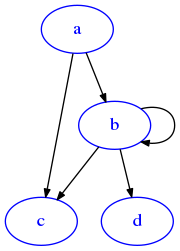

In [20]:
draw_nx(G)

From the picture above, we notice there are no weights displayed, because in networkx they are just  considered optional attributes of edges. 

To see all the attributes of an edge, you can write like this:

In [21]:
G['a']['b']

{}

This graph has no attributes for the node, so we get back an empty dict. If we wanted to add a weight of `123` to that particular `a b` edge, you could write like this:

In [22]:
G['a']['b']['weight'] = 123

In [23]:
G['a']['b']

{'weight': 123}

Let's try to display it:

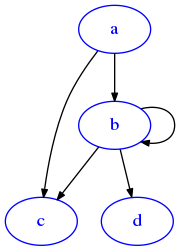

In [24]:
draw_nx(G)

We still don't see the weight as weight can be one of many properties: the only thing that gets displayed is the propery `label`. So let's set label equal to the weight:

In [25]:
G['a']['b']['label'] = 123

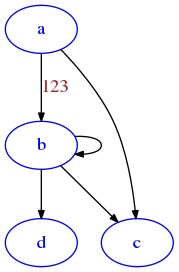

In [26]:
draw_nx(G)

### Converting networkx objects to other formats

If you try to just output the string representation of the graph, networkx will give the empty string:

In [27]:
print(G)

In [28]:
str(G)

''

In [29]:
repr(G)

'<networkx.classes.digraph.DiGraph object at 0x7f2fa43135f8>'

In [30]:
To convert to the dict of adjacency lists we know, you can use this method:

SyntaxError: invalid syntax (<ipython-input-30-a6141a777b26>, line 1)

In [ ]:
nx.to_dict_of_lists(G)

The above works, but it doesn't convert additional edge info. For a complete conversion, use `nx.to_dict_of_dicts`

In [ ]:
nx.to_dict_of_dicts(G)

### mat_to_nx

Now try by yourself to convert a matrix as list of lists along with node ids (like [you did before](#mat_ids_to_adj)) into a networkx object.

This time, don't create a dictionary to pass it to nx.DiGraph constructor: instead, use networkx methods like `.add_edge` and `add_node`. For usage example, check the [networkx tutorial](https://networkx.github.io/documentation/stable/tutorial.html). Do you need to explicitly call `add_node` before referring to some node with `add_edge` ?

In [ ]:
def mat_to_nx(mat, ids):
    """ Given a real-valued nxn matrix as list of lists and a list of immutable identifiers for the nodes,
        RETURN the corresponding graph in networkx format (as nx.DiGraph). 
        
        If matrix is not nxn or ids length does not match n, raise ValueError
        
        - DON'T transform into a dict, use add_ methods from networkx object!
        - WARNING: Remember to set the labels to the weights AS STRINGS!
    """
            
    #jupman-raise
    
    G = nx.DiGraph()
    n = len(mat)
    m = len(mat[0])
    if n != m:
        raise ValueError('matrix is not nxn !')
    if n != len(ids):
        raise ValueError("Identifiers quantity is different from matrix size!" )
    for i in range(n):
        G.add_node(ids[i])
        for j in range(n):
            if mat[i][j] != 0:
                G.add_edge(ids[i], ids[j])
                G[ids[i]][ids[j]]['weight'] = mat[i][j]
                G[ids[i]][ids[j]]['label'] = str(mat[i][j])
    return G
    #/jupman-raise
        
    

try: 
    mat_ids_to_adj([[0, 3]], ['a','b'])
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"  

try: 
    mat_ids_to_adj([[0]], ['a','b'])
    raise Exception("SHOULD HAVE FAILED !")  
except ValueError: 
    "passed test"      
    
m1 = [
        [0]
    ]

d1 =  {'a': {}}

assert nx.to_dict_of_dicts(mat_to_nx(m1, ['a'])) == d1

m2 = [
        [7]
    ]

d2 =  {'a': {'a': {'weight': 7, 'label': '7'}}}
assert nx.to_dict_of_dicts(mat_to_nx(m2, ['a'])) == d2


m3 = [
        [0,0],
        [0,0]
    ]

d3 =  {
         'a':{},
         'b':{}
     }
assert nx.to_dict_of_dicts(mat_to_nx(m3,['a','b'])) == d3


m4 = [
        [7,9],
        [8,6]
    ]

d4 =  {
         'a':{'a': {'weight':7,'label':'7'},
              'b' : {'weight':9,'label':'9'},
             },
         'b':{'a': {'weight':8,'label':'8'},
              'b' : {'weight':6,'label':'6'},
             }
              
     }
assert nx.to_dict_of_dicts(mat_to_nx(m4, ['a','b'])) == d4

m5 = [
        [0,0],
        [0,7]
    ]

d5 =  {
         'a':{},
         'b':{
                 'b' : {'weight':7,'label':'7'},
             }

     }


assert nx.to_dict_of_dicts(mat_to_nx(m5,['a','b'])) == d5


m6 = [
        [7,0,0],
        [7,9,0],
        [0,7,0]  
    ]

d6 =  {
         'a':{
                'a' : {'weight':7,'label':'7'},
             },
         'b': {
                'a':  {'weight':7,'label':'7'},
                'b' : {'weight':9,'label':'9'}
               },

         'c':{
              'b' : {'weight':7,'label':'7'}
             }
     }


assert nx.to_dict_of_dicts(mat_to_nx(m6,['a','b','c'])) == d6
    

In [ ]:
draw_nx(mat_to_nx([
        [7,0,0],
        [7,9,0],
        [0,7,0]  
    ], ['a','b','c']))

### networkx Indegrees and outdegrees 

As a first benefit, with Networkx we can easily calculate indegrees and outdegrees of a node:

In [ ]:
G.in_degree('c')

In [ ]:
G.out_degree('c')

**QUESTION**: What is the outdegree of `'b'` ? Try to think about it and then confirm your thoughts with networkx:

In [ ]:
# write here
#print("indegree  b:  %s" % G.in_degree('b'))
#print("outdegree b:  %s" % G.out_degree('b'))

**QUESTION**: We defined _indegree_ and _outdegree_. Can you guess what the _degree_ might be ? In particular, for a self pointing node like `'b'`, what could it be? Try to use `G.degree('b')` methods to validate your thoughts.

In [ ]:
# write here
#print("degree  b:  %s" % G.degree('b'))

**ANSWER**: it is the sum of indegree and outdegree. In presence of a self-loop like for `'b'`, we count the self-loop twice, once as outgoing edge and one as incident edge

In [ ]:
# write here
#G.degree('b')

<div class="alert alert-warning">

**TO BE CONTINUED ...**
</a>